# Detector de Emociones en Imágenes

##Este proyecto usa un modelo de Hugging Face para detectar emociones en rostros humanos a partir de una imagen. También traduce la emoción al español.

In [1]:
!pip install transformers
!pip install Pillow

In [2]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
# Pipeline de clasificación de emociones
# emotion_classifier = pipeline("image-classification", model="j-hartmann/emotion-english-distilroberta-base") # This model is not supported for image classification
emotion_classifier = pipeline("image-classification", model="dima806/facial_emotions_image_detection")

# Pipeline de traducción de inglés a español
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")

config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:177: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


In [16]:
def detectar_emocion(imagen):
    resultado = emotion_classifier(imagen)
    emocion_en = resultado[0]['label']
    emocion_es = translator(f"The person looks {emocion_en}")[0]['translation_text']

    return {
        "Emoción detectada (English)": emocion_en,
        "Emoción en español": emocion_es,
        "Confianza del modelo": f"{resultado[0]['score']:.2%}"
    }

In [18]:
# Subí una imagen desde tu computadora
from google.colab import files
uploaded = files.upload()

# Abrir la imagen (usá el nombre del archivo que subiste)
img = Image.open(list(uploaded.keys())[0])
img.show()

Saving img_1.jpeg to img_1 (1).jpeg


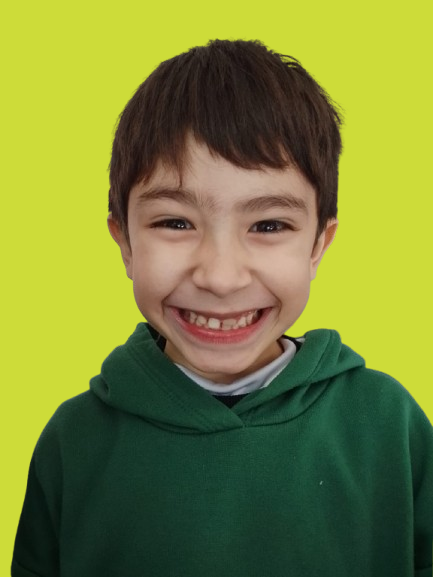

In [30]:
from IPython.display import Image, display
display(Image('img_1.png'))  # Cambiá el nombre según tu archivo

In [31]:
# Probar el detector
resultados = detectar_emocion(img)
print(resultados)

{'Emoción detectada (English)': 'happy', 'Emoción en español': 'La persona se ve feliz.', 'Confianza del modelo': '64.99%'}


In [23]:
# Subí una imagen desde tu computadora
from google.colab import files
uploaded = files.upload()

# Abrir la imagen (usá el nombre del archivo que subiste)
from PIL import Image # Ensure PIL.Image is used
img_2 = Image.open(list(uploaded.keys())[0])
img_2.show()

Saving img_2.jpeg to img_2 (3).jpeg


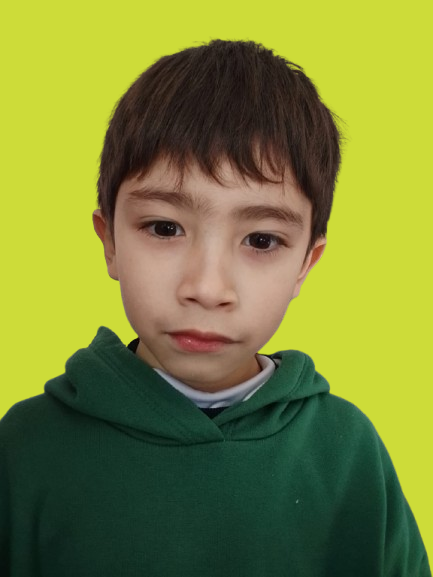

In [28]:
from IPython.display import Image, display
display(Image('img_2.png'))  # Cambiá el nombre según tu archivo

In [29]:
# Probar el detector
resultados = detectar_emocion(img_2)
print(resultados)

{'Emoción detectada (English)': 'neutral', 'Emoción en español': 'La persona parece neutral.', 'Confianza del modelo': '66.72%'}
